# Question 3

The falls.txt file features data coming from a recent study aiming at reducing the number of falls among elder people. In this study, the 340 participants were randomly allocated either to a control group (169 people), where they went through usual care programs, or to an intervention group (171 people) in which they performed exercises  aiming at increasing balance and lower limbs muscle strength.  

The researchers want to check the hypothesis that performing these exercises will help elder people fall less. The response variable falls consists of the reported number of falls during the period of study. The days variable indicates the length of this period, as it varies between participants. The id variable gives a numerical code for each participant. The available covariates are:

•falls_past12mo:  the recalled number of falls over the 12 months prior to the study;

•gait_speed:  the walking speed in m/s, measured over a 4m walk at the beginning of the study;

•age:  age in years;

•male, a dummy coding 1 for male participants;

•walk_aid,  a  categorical  variable  with  3  levels  (Rollator,  Stick,  and  Nil) showing the type of walking aid, if any, required by the participant;

•and the dummy intervention indicating the group allocation, where “A”stands for the control group.

As a statistician, you are asked to provide a sensible model for these data and test the research hypothesis. In your analysis, you may explore the main effects of the covariates and some meaningful interactions. Answer these questions and join your outputs where necessary:

1.  Describe your modeling approach (nature of the response, hypotheses, model specifications, etc.).


2.  Explain  how  you  have  obtained  your  final  good  model(s). Validate this (these) model(s) using the results and graphs of your analysis. 

### Data Preprocessing 

In [100]:
import pandas as pd
f = open("/Users/zhejindong/Desktop/falls.txt", "r")

In [101]:
data=[]
for line in f.readlines():
    #print(line)
    data.append(line.strip().split(" "))
    
columns=data[0]
#columns.insert(0,'del')

In [102]:
col=['del']
for i in range(len(columns)):
    #print(columns[i].split('"')[1])
    col.append((columns[i].split('"')[1]))

In [103]:
col

['del',
 'id',
 'falls_past12mo',
 'gait_speed',
 'age',
 'days',
 'intervention',
 'falls',
 'male',
 'walk_aid']

In [104]:
data=pd.DataFrame(data[1:],columns=col).drop(columns=['del'])

In [115]:
data['intervention']=data['intervention'].replace(["\"A\"","\"B\""], ["A","B"])

In [117]:
data['male']=data['male'].replace(["\"0\"","\"1\""], [0,1])

In [118]:
data['walk_aid']=data['walk_aid'].replace(["\"Nil\"","\"Rollator\"","\"Stick\""], ['Nil','Rollator','Stick'])

In [120]:
data=data.drop(columns=['id'])

In [121]:
after=data['falls'].astype('int32') /data['days'].astype('int32')
before=data['falls_past12mo'].astype('int32')/365
data['falling_rate_A']=after
data['falling_rate_B']=before
data.head()

,falls_past12mo,gait_speed,age,days,intervention,falls,male,walk_aid,falling_rate_A,falling_rate_B
0,1,1.11111111111111,80,365,A,0,0,Nil,0.000000,0.00274
1,1,0.833333333333333,71,365,A,4,0,Nil,0.010959,0.00274
2,0,0.851063829787234,73,365,A,1,0,Nil,0.002740,0.00000
3,0,1.05263157894737,76,365,A,0,0,Nil,0.000000,0.00000
4,1,0.909090909090909,85,365,A,1,0,Nil,0.002740,0.00274


In [122]:
data.head()

,falls_past12mo,gait_speed,age,days,intervention,falls,male,walk_aid,falling_rate_A,falling_rate_B
0,1,1.11111111111111,80,365,A,0,0,Nil,0.000000,0.00274
1,1,0.833333333333333,71,365,A,4,0,Nil,0.010959,0.00274
2,0,0.851063829787234,73,365,A,1,0,Nil,0.002740,0.00000
3,0,1.05263157894737,76,365,A,0,0,Nil,0.000000,0.00000
4,1,0.909090909090909,85,365,A,1,0,Nil,0.002740,0.00274


In [123]:
#data['gait_speed']=data['gait_speed'].astype(float)

In [124]:
#data.round({'gait_speed': 3, 'falling_rate_A': 3,'falling_rate_B':3})

In [125]:
data=pd.get_dummies(data,columns=['intervention','male','walk_aid'])

In [126]:
data['diff']=data['falling_rate_B']-data['falling_rate_A']

In [127]:
data.head()

,falls_past12mo,gait_speed,age,days,falls,falling_rate_A,falling_rate_B,intervention_A,intervention_B,male_0,male_1,walk_aid_Nil,walk_aid_Rollator,walk_aid_Stick,diff
0,1,1.11111111111111,80,365,0,0.000000,0.00274,1,0,1,0,1,0,0,0.002740
1,1,0.833333333333333,71,365,4,0.010959,0.00274,1,0,1,0,1,0,0,-0.008219
2,0,0.851063829787234,73,365,1,0.002740,0.00000,1,0,1,0,1,0,0,-0.002740
3,0,1.05263157894737,76,365,0,0.000000,0.00000,1,0,1,0,1,0,0,0.000000
4,1,0.909090909090909,85,365,1,0.002740,0.00274,1,0,1,0,1,0,0,0.000000


In [128]:
data=data.astype(float)

In [129]:
data=data.drop(columns=['falls_past12mo','falls'])

### 1 Describe your modeling approach (nature of the response, hypotheses, model specifications, etc.).

Response: the difference between daily falling rates 

Hypothese: Intervention cannot help lower falling rates

model specification

Poisson regression model condering the response is count;
Log function as link function

### 2 Explain how you have obtained your final good model(s). Validate this (these) model(s) using the results and graphs of your analysis.

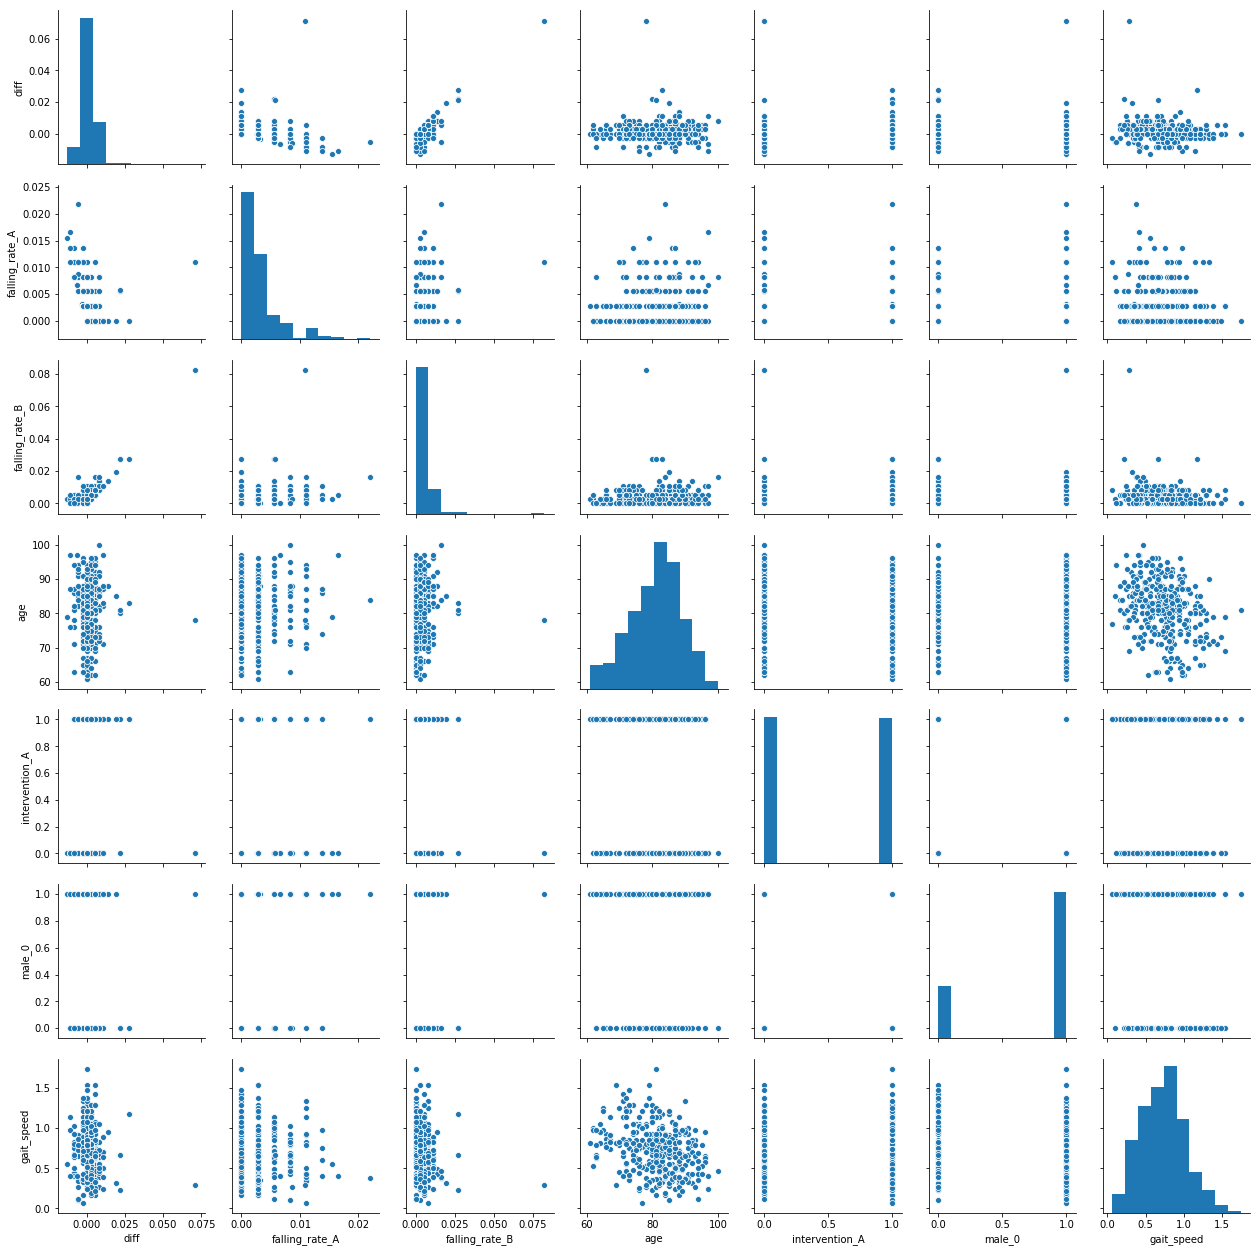

In [131]:
import seaborn as sns
sns.pairplot(data,vars=['diff','falling_rate_A','falling_rate_B','age','intervention_A','male_0','gait_speed'])

(array([  4.,  12.,   2.,  11.,  44., 104.,  88.,  47.,  16.,   6.,   0.,
          1.,   0.,   1.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([-0.01274015, -0.01034007, -0.00793998, -0.0055399 , -0.00313981,
        -0.00073973,  0.00166036,  0.00406044,  0.00646053,  0.00886061,
         0.0112607 ,  0.01366078,  0.01606087,  0.01846095,  0.02086104,
         0.02326112,  0.02566121,  0.02806129,  0.03046138,  0.03286146,
         0.03526155,  0.03766163,  0.04006172,  0.0424618 ,  0.04486189,
         0.04726197,  0.04966206,  0.05206214,  0.05446223,  0.05686231,
         0.05926239,  0.06166248,  0.06406256,  0.06646265,  0.06886273,
         0.07126282]),
 <a list of 35 Patch objects>)

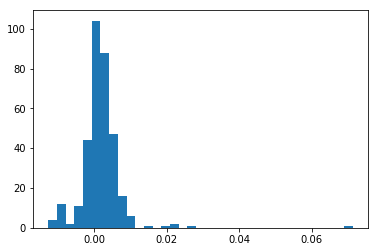

In [132]:
plt.hist(data['diff'],bins=35)

### Comment on the model

We plan to check the influnce of intervention on falling rates. Thus, we chose difference of falling rates as our response. The distribution of resonse in general looks like gaussian distribution, so we choose linear regression as the model. 

In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [134]:
data.head()

,gait_speed,age,days,falling_rate_A,falling_rate_B,intervention_A,intervention_B,male_0,male_1,walk_aid_Nil,walk_aid_Rollator,walk_aid_Stick,diff
0,1.111111,80.0,365.0,0.000000,0.00274,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.002740
1,0.833333,71.0,365.0,0.010959,0.00274,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.008219
2,0.851064,73.0,365.0,0.002740,0.00000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.002740
3,1.052632,76.0,365.0,0.000000,0.00000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000
4,0.909091,85.0,365.0,0.002740,0.00274,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000


In [175]:
results = smf.ols('diff ~ gait_speed+age+intervention_A+intervention_B+male_1+male_0+walk_aid_Nil+walk_aid_Rollator+walk_aid_Stick', data=data).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.220
Date:                Wed, 08 May 2019   Prob (F-statistic):              0.296
Time:                        17:51:56   Log-Likelihood:                 1258.2
No. Observations:                 340   AIC:                            -2502.
Df Residuals:                     333   BIC:                            -2476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0021      0.00

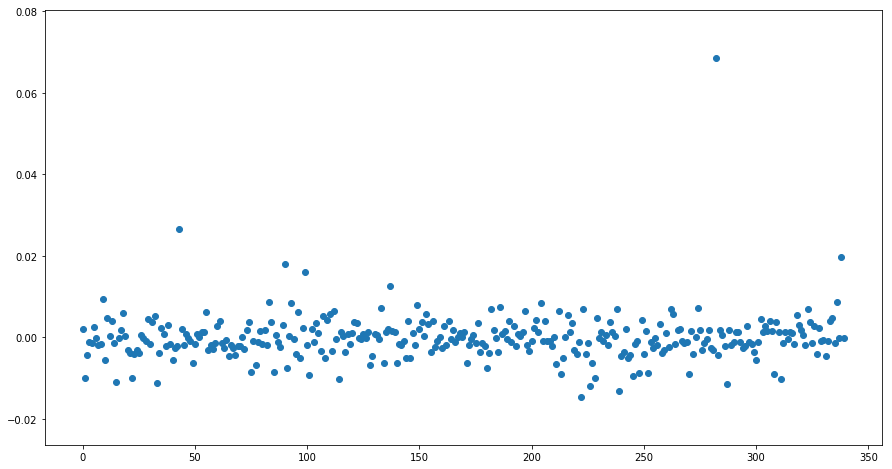

In [176]:
plt.figure(figsize=(15,8))
plt.scatter(list(range(results.resid.shape[0])),results.resid)

### Comment on residual plot 
From the residual of regression model, we can see the errors generally have a normal distribution which justifies the correctness of the model. 

## 3.  How did you introduce the falls_past12mo variable in your model ? Justify your approach.

The overarching goal is testing whether intervention make a difference to the falling rate. Our focus is daily falling rate. We use falls_past12mo/365 as base falling rate, and base falling rate - new falling rate as our response. Through modeling the falling rate difference and interpreting the coefficients of invervention, we can in average get the influence of intervention. 

## 4. What is the role of the days variable in such a count model ?

The role of days depends on how we model the response. I use rate as response, so days variable is only used for calculating the daily falling rate (rate=falls/days)

## 5. Is the intervention variable significant?  Interpret its coefficient, even if it’s not significantly different from zero. What would you conclude about the research hypothesis ?  You may have found an unexpected effect,  try nevertheless to give an explanation for it.

intervention_A        0.0013      0.001      1.497      0.135      -0.000       0.003
intervention_B        0.0007      0.001      0.809      0.419      -0.001       0.003


We care about two indicators intervention_A and intervention_B. The coefficient of intervention_A is 0.0013 >0 which means intervention does have a positive affect on the falling rate. p value of intervention is 0.135 (>0.1), so we can reject the h0 with confidence 0.865 (which is not significant enough if using 0.95 as metric)

we compare intervention_A (test_case) and intervention_B (base case), the former has a higher coefficient and lower p value, which to some degree indicates intervention can help prevent falling, though we do not have much certainty about the conclusion. 

Another interesting thing I found is, for base case, even if nothing is done on people, they can still turn better than before, which can be seen from the coefficient of intervention_B is positive. 


## 6.  Did you find any significant interaction ?  Interpret them and try to give them some meaning regarding the data.

### Adding interaction and retrain the model

In [203]:
results = smf.ols('diff ~ gait_speed+male_0+male_1+age+intervention_A+intervention_B+walk_aid_Nil+walk_aid_Rollator+walk_aid_Stick+intervention_A*male_1+intervention_A*male_0+intervention_A*walk_aid_Nil+intervention_A*walk_aid_Rollator', data=data).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.293
Date:                Wed, 08 May 2019   Prob (F-statistic):              0.240
Time:                        18:31:19   Log-Likelihood:                 1260.4
No. Observations:                 340   AIC:                            -2501.
Df Residuals:                     330   BIC:                            -2463.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### Comment on the regression result:
We fit multiple interaction terms to the ols model. We found intervention_A*male_1 has lowest p_value and also the coefficient of intervention_A:male_1 is positive. 
We could conclude that interventions have a better effect for men than women.
